# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus

sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Перед обучением следует, поработать с выбросами, так как они могут повлиять на наше дерево. В целом деревья могут работать на категориальных признаках, но мы работаем с библиотекой sklearn, которая требует численных значений, так что их нужно преобразовать. В основном на деревья не будут влиять линейные преобразования данных, так что замена на линейные функции можно не рассматирвать. А вот стандортизацию признаков нужно привести, так как иначе дерево может сильно "расползтись".

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Прочитаем данные, разделим их на три части, и выделим 

In [7]:
col = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df = pd.read_csv('day.csv')[col]
probs = np.random.rand(len(df))
training_mask = probs < 0.6
test_mask = (probs>=0.6) & (probs < 0.8)
validatoin_mask = probs >= 0.80


df_training = df[training_mask].reset_index(drop=True)
df_test = df[test_mask].reset_index(drop=True)
df_validation = df[validatoin_mask].reset_index(drop=True)
df_training.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
1,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
2,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
3,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
4,1,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,1406


Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [74]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt' # целевой признак

**Работа с выбросами.** Ограничим наши данные сверху 3 квартилью + разность между 1 и 3 квартильну умноженной на 2. Аналогично с низу, только с минусом.

In [9]:
def df_clear(df):
    for i in real_features + ['cnt']:
        qua1 = np.quantile(df[i], 0.75)
        qua2 = np.quantile(df[i], 0.25)
        df = df[df[i] <= qua1 + 2 * (qua1 - qua2)]
        df = df[df[i] >= qua2 - 2 * (qua1 - qua2)]
    return df

df_validation = df_clear(df_validation)
df_test = df_clear(df_test)
df_training = df_clear(df_training)

 С помощью класса 'OneHotEncoder' закадируем категориальные признаки.

In [31]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df_training[categorial_features])
learned = encoder.fit_transform(df_training[categorial_features])
valid = encoder.fit_transform(df_validation[categorial_features])
test = encoder.fit_transform(df_test[categorial_features])

In [32]:
X_train = np.hstack([df_training[real_features], learned])
Y_train = df_training[target_feature]

X_valid = np.hstack([df_validation[real_features], valid])
Y_valid = df_validation[target_feature]

X_test = np.hstack([df_test[real_features], test])
Y_test = df_test[target_feature]

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

In [33]:
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
predictions = clf.predict(X_valid)
metrics.mean_absolute_percentage_error(predictions, Y_valid)

1.9624795621640125

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [105]:
error = []

for i in np.arange(25):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i + 1)
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_valid)
    error.append(metrics.mean_absolute_percentage_error(predictions, Y_valid))

Построим графкик зависимости ошибки от глубины дерева

Text(0.5, 1.0, 'Зависимости ошибки от максимальной глубины дерева')

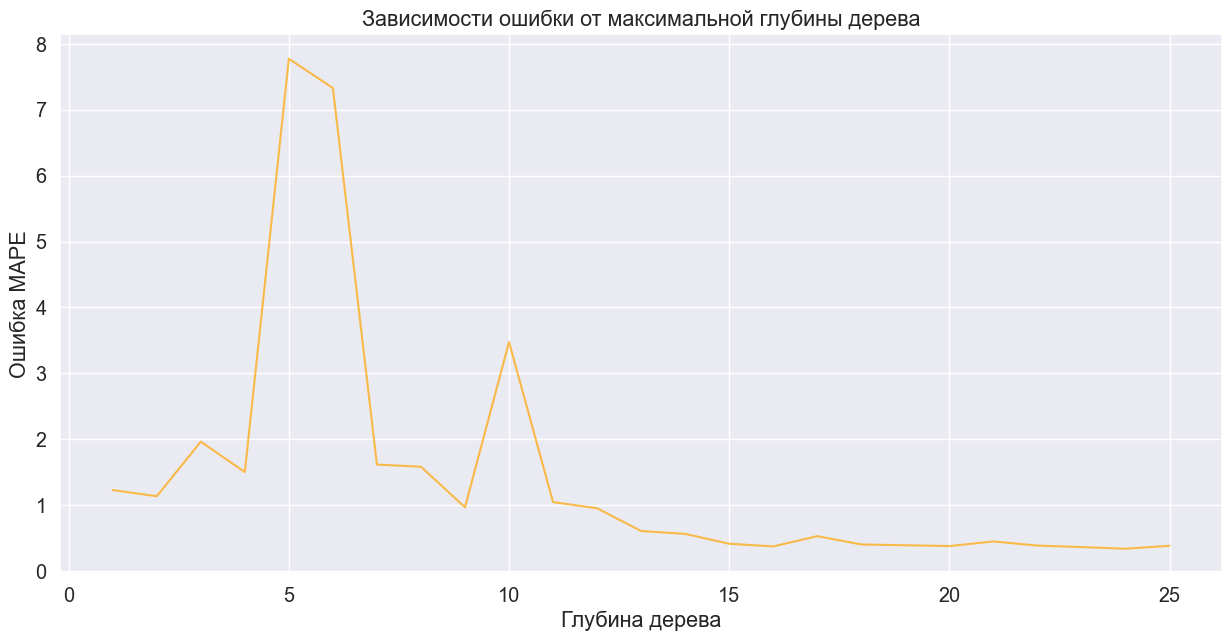

In [106]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(25) + 1, error, color='orange', alpha=0.7)
plt.xlabel('Глубина дерева')
plt.ylabel('Ошибка MAPE')
plt.title('Зависимости ошибки от максимальной глубины дерева')

Из графика можно сделать предположение, что глубина 15 будет оптимальной.

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [107]:
error = []

for i in np.arange(70):
    clf = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_leaf=i+1)
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_valid)
    error.append(metrics.mean_absolute_percentage_error(predictions, Y_valid))

Построим график звависимости ошибки от минимального числа объектов в листе.

Text(0.5, 1.0, 'Зависимости ошибки от минимального числа объектов в листе')

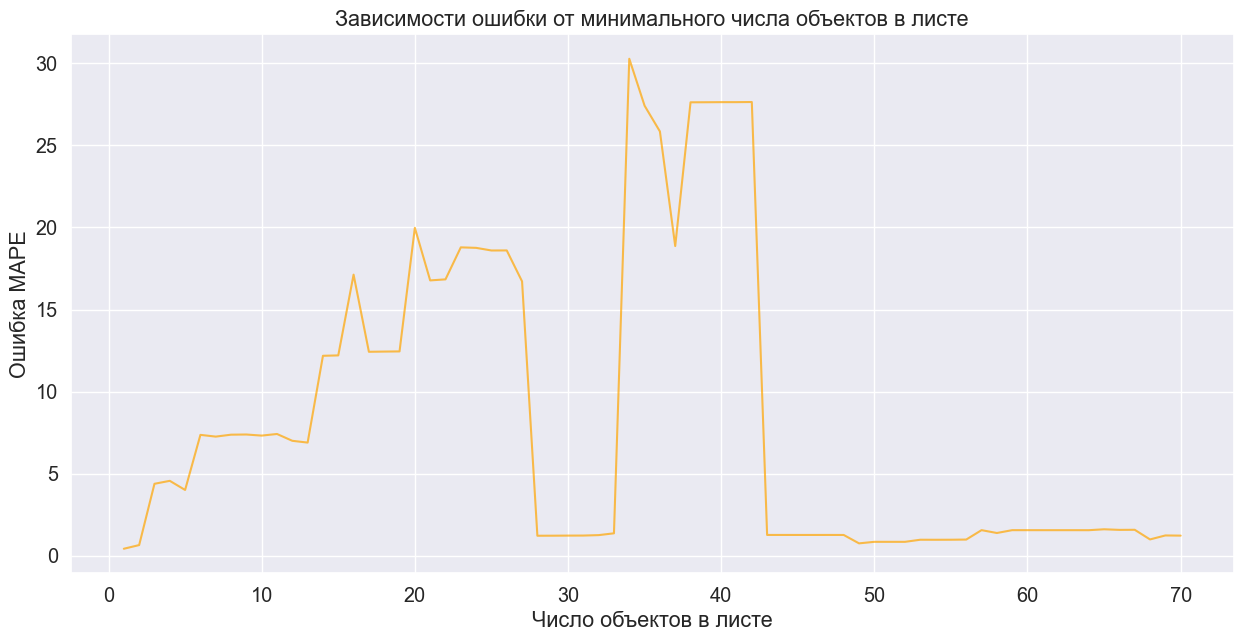

In [108]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(70) + 1, error, color='orange', alpha=0.7)
plt.xlabel('Число объектов в листе')
plt.ylabel('Ошибка MAPE')
plt.title('Зависимости ошибки от минимального числа объектов в листе')

В качество минимального числа листьев, оптимальней всего будет взять 30.

Итак были получены следующие гиперпараметры:

1. Максимальная глубна дерева: 15
2. Минимальное число объектов в листе: 36

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

Построим функцию визулизацию, аналогичную с занятия.

In [41]:
def get_graphviz_graph(decision_tree_regressor):
    decision_tree_regressor.fit(X_train, Y_train)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=real_features + list(encoder.get_feature_names_out()), class_names='cnt',  
        filled=True, rounded=True, special_characters=True)  
    return graphviz.Source(dot_data)

Теперь визуализируем дерево: 

In [48]:
camera_regressor = DecisionTreeRegressor(criterion='absolute_error', max_depth=15, min_samples_split=30)
#К сожалению метод graphiz отказался работать, так как он не нашел какие-то файлы. Исправит это я не смогла

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [83]:
col = real_features + list(encoder.get_feature_names_out())
rang = [i for i in range(34)]
sl = {}
for i, k in zip(rang, col):
    sl[i] = k

In [82]:
camera_regressor.fit(X_train, Y_train)
importance = pd.DataFrame(camera_regressor.feature_importances_.reshape(1, X_train.shape[1])).rename(sl, axis='columns')
importance

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.491178,0.147228,0.166741,0.024844,0.011302,0.0,0.0,0.040516,0.0,0.010348,...,0.006755,0.0,0.0,0.0,0.0,0.005454,0.0,0.0,0.0,0.037349


Категориальные признаки почти не влияют на дерево, так что удалим их.

In [85]:
importance = importance[real_features]
importance

,temp,atemp,hum,windspeed
0,0.491178,0.147228,0.166741,0.024844


Text(0.5, 1.0, 'Важность признаков')

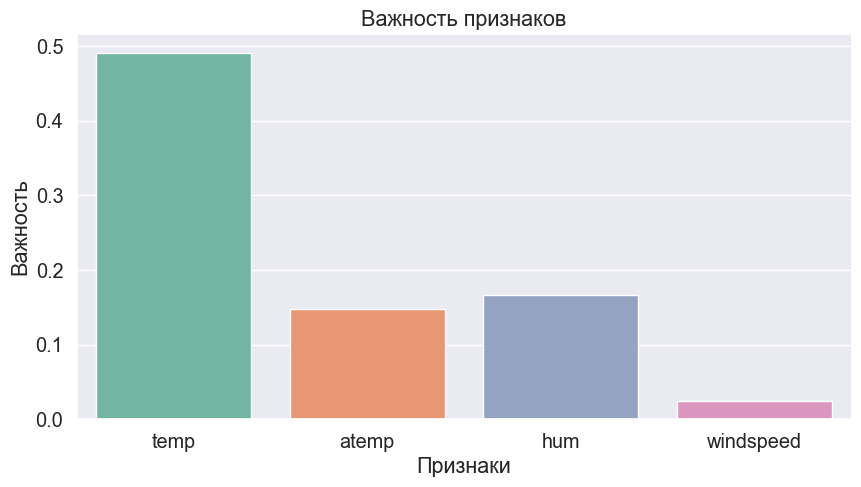

In [86]:
plt.figure(figsize=(10, 5))
sns.barplot(importance)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков')

Выводы: Самым важным признаком при построении дерева является temp. Ошибка при построенении убывает с ростом гиперпараметров.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [87]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [92]:
def predict_error(X, Y):
    pred = np.zeros(Y.shape[0])
    predict_mape = []
    for i in range(500):
        pred = (pred * i + model.estimators_[i].predict(X)) / (i + 1)
        predict_mape.append(metrics.mean_absolute_percentage_error(pred, Y))
    return predict_mape

valid_predict_mape = predict_error(X_valid, Y_valid)
train_predict_mape = predict_error(X_train, Y_train)

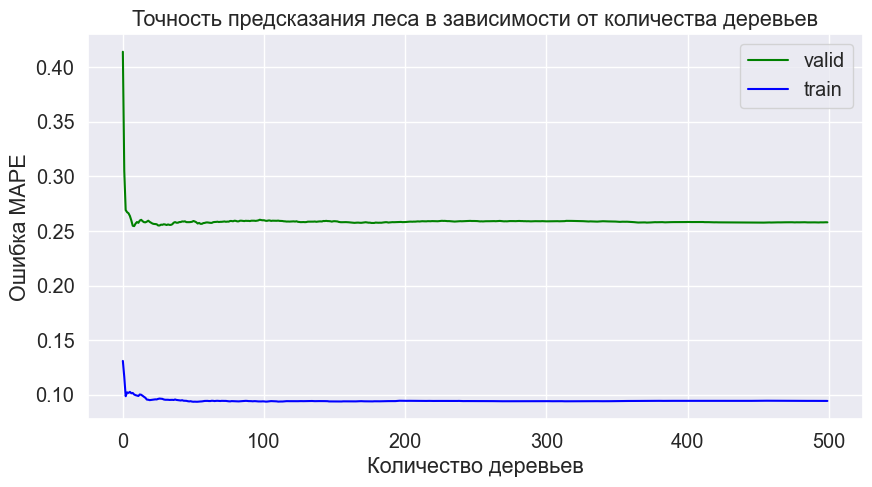

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(500), valid_predict_mape, label='valid', color='green')
plt.plot(np.arange(500), train_predict_mape, label='train', color='blue')
plt.xlabel('Количество деревьев')
plt.ylabel('Ошибка MAPE')
plt.title('Точность предсказания леса в зависимости от количества деревьев')
plt.legend()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

In [99]:
importance = pd.DataFrame(model.feature_importances_.reshape(1, X_train.shape[1])).rename(sl, axis='columns')
importance = importance[real_features]
importance

,temp,atemp,hum,windspeed
0,0.434439,0.126568,0.146261,0.073842


Text(0.5, 1.0, 'Важность признаков')

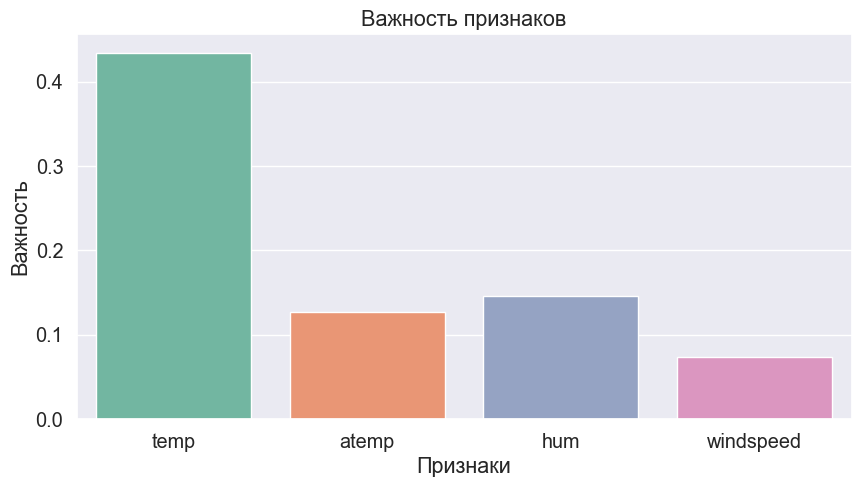

In [100]:
plt.figure(figsize=(10, 5))
sns.barplot(importance)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков')

Вывод: Признак важности не изменился. Ошибка падет с ростом количества деревьев в лесу.